# INTRO

The purpose of this notebook is to show how time series and their asymptotic properties can be calculated with simple functions (```math``` and ```numpy```).

Each time series is firstly described in its analytical form, then plots are used to show the trends, drift, and convergence (if any) of each series.

# IMPORT LIBRARIES

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# USER DEFINED FUNCTIONS

## fn_makeplot

In [20]:
def fn_makeplot(ts, title = "", plotwidth = 20, plotheight = 3, usexlog = False, yspace = 1):
    plt.style.use('classic')
    
    fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (plotwidth, plotheight))
    fig.suptitle(f"{title}", fontsize = 16, y = yspace)
    
    y_max = np.floor(max(ts))+1
    y_min = np.floor(min(ts))
    ax1.set_yticks(ticks = np.insert(np.arange(y_min,y_max,step = (y_max-y_min)/6),0,0))
    ax1.set_ylim(y_min,y_max)
    if usexlog == True:
        ax1.set_xscale('log')
    
    ax1.grid(True, alpha = 0.7, zorder = 1)
    ax1.plot(ts, 'b', alpha = 0.7, zorder = 2)
    
    plt.show()
    plt.style.use('default')

    print("\n")

## fn_makegridplot

In [21]:
# mpl.rcParams.keys()

In [22]:
def fn_makegridplot(xps, ts, title = "", plotwidth = 20, plotheight = 3, usexlog = (False,False), useseries_hist = "ts", usexlog_hist = False, yspace = 1):
    plt.style.use('classic')
    
    # fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (plotwidth, plotheight))
    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 2, figsize = (plotwidth, plotheight))
    ax1 = plt.subplot(2,3,(1,2))
    ax2 = plt.subplot(2,3,(4,5))
    ax3 = plt.subplot(2,3,(3,6))
    fig.suptitle(f"{title}", fontsize = 16, y = yspace)
    
    y_max = np.floor(max(ts))+1
    y_min = np.floor(min(ts))
    ax1.set_yticks(ticks = np.arange(y_min,y_max,step = (y_max-y_min)/6))
    ax1.set_ylim(y_min,y_max)
    if usexlog[0] == True:
        ax1.set_xscale('log')
    
    ax1.grid(True, alpha = 0.7, zorder = 1)
    ax1.plot(ts, 'b', alpha = 0.7, zorder = 2)

    y_max = np.floor(max(xps))+1
    y_min = np.floor(min(xps))
    ax2.set_yticks(ticks = np.arange(y_min,y_max,step = (y_max-y_min)/6))
    ax2.set_ylim(y_min,y_max)
    if usexlog[1] == True:
        ax2.set_xscale('log')
    
    ax2.grid(True, alpha = 0.7, zorder = 1)
    ax2.plot(xps, 'b', alpha = 0.7, zorder = 2)

    ax3.grid(True, alpha = 0.7, zorder = 1)
    mpl.rcParams['patch.edgecolor'] = 'b'
    if useseries_hist == 'ts': 
        ax3.hist(ts, facecolor = 'blue', alpha = 0.5, bins = math.floor(len(set(ts))/10), zorder = 2)
    elif useseries_hist == 'xps':
        ax3.hist(xps, facecolor = 'blue', alpha = 0.5, bins = math.floor(len(set(xps))/10), zorder = 2)

    plt.show()
    plt.style.use('default')

    print("\n")

## fn_expected_value_(*)

In [23]:
def fn_expected_value_StochVar(ts,array_z,array_et):
    expvalues = []
    for t in range(T):
        t = t + 1
        array_et_until = array_et[:t]
        psum = round(sum(array_et_until)/t + array_z[t-1],2)
        expvalues.append(psum)
    return expvalues

def fn_expected_value_MA1(ts):
    expvalues = []
    for t in range(T):
        t = t + 1
        ts_until = ts[:t]
        psum = round(sum(ts_until)/t,2)
        expvalues.append(psum)
    return expvalues

def fn_expected_value_DJRVwB(ts,mu1,mu2,array_indic,array_et):
    expvalues = []
    for t in range(T):
        t = t + 1
        array_indic_until = array_indic[:t]
        array_et_until = array_et[:t]
        psum = round(mu1 + (mu2-mu1) * sum(array_indic_until)/t + sum(array_et_until)/t,2)
        expvalues.append(psum)
    return expvalues

def fn_expected_value_DeterministicTrend(ts,array_et,alpha,beta,k=0):
    expvalues = []
    for t in range(T):
        t = t + 1
        ts_until = ts[:t]
        array_et_until = array_et[:t]
        M = 1/(t**(k+1))
        psum = (M*alpha) + (M*beta*(t*(t+1))/2) + (M*sum(array_et_until)/t)
        expvalues.append(psum)
    return expvalues    

def fn_expected_value_RandomWalk(ts,k=0):
    expvalues = []
    for t in range(T):
        t = t + 1
        ts_until = ts[:t]
        psum = round(sum(ts_until)/(t**(k+1)),2)
        expvalues.append(psum)
    return expvalues

# MAIN VARIABLES

In [24]:
ROUNDING_DIGITS = 2
T = 10000

# TIME SERIES

## $x_t^{SV} = z + ε_t$

- $ε_t∼i.i.d.(0,σ_{ε}^{2})$
- $E(z) = 0$ , $Var(z) = σ_{z}^{2}$


### Stochastic Variable + Error Term

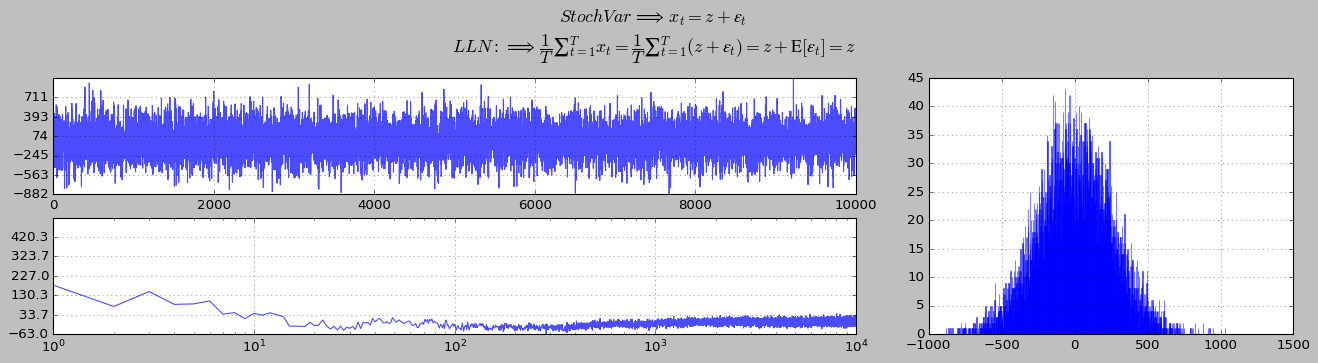

In [25]:
mean = 0
sd = 250

z_mean = 0
z_sd = 10

def StochVar(T,ROUNDING_DIGITS):
    x = 0

    ts = []
    array_z = []
    array_et = []
    for t in range(T):
        z = np.round(np.random.normal(z_mean,z_sd,1),ROUNDING_DIGITS)[0]
        et = np.round(np.random.normal(mean,sd,1),ROUNDING_DIGITS)[0]
        x = z + et
        array_z.append(z)
        array_et.append(et)
        ts.append(x)

    return ts,array_z,array_et

ts,array_z,array_et = StochVar(T,ROUNDING_DIGITS)

xps = fn_expected_value_StochVar(ts,array_z,array_et)

fn_makegridplot(xps, ts, title = f"$StochVar~⟹~$"+r"$x_t = z + ε_t$" + f"\n" + r"$LLN:~⟹~\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}(z+ε_{t})=z+Ε[ε_{t}]=z$",
                plotwidth = 20,
                plotheight = 4,
                usexlog = (False,True),
                useseries_hist = 'ts',
                yspace = 1.12)

## $x_t^{MA(1)} = ε_t + θε_{t-1}$

- $ε_t∼i.i.d.(0,σ_{ε}^{2})$
- $ 0 < θ < 1$

## MA(1) - Moving Average Lag-1

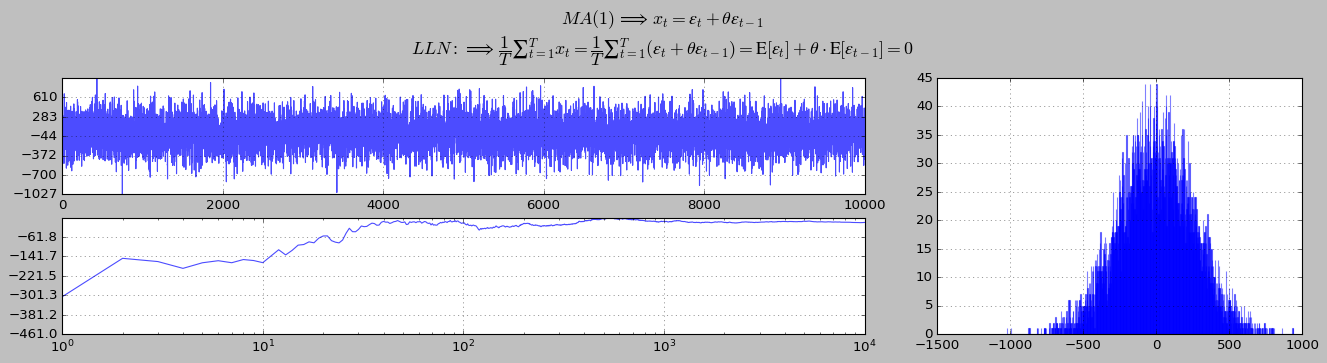

In [26]:
mean = 0
sd = 250

def MA1(T,ROUNDING_DIGITS):
    x = 0
    et_1 = 0
    theta = 0.5

    ts = []
    for t in range(T):
        et_1 = round(et_1 * theta,ROUNDING_DIGITS)
        et = np.round(np.random.normal(mean,sd,1),ROUNDING_DIGITS)[0]
        x = et
        ts.append(x)
        et_1 = et

    return ts

ts = MA1(T,ROUNDING_DIGITS)

xps = fn_expected_value_MA1(ts)

fn_makegridplot(xps, ts, title = f"$MA(1)~⟹~$"+r"$x_t = ε_t + \theta ε_{t-1}$" + f"\n" + r"$LLN:~⟹~\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}(ε_t + \theta ε_{t-1})=Ε[ε_t] + \theta \cdot Ε[ε_{t-1}]=0$",
                plotwidth = 20,
                plotheight = 4,
                usexlog = (False,True),
                useseries_hist = 'ts',
                yspace = 1.12)

## $x_t^{DRV} = μ_1 1_{\left(v_t ≤ γ \right)} + μ_2 1_{\left(v_t > γ \right)} + ɛ_t $
## $x_t = μ_1 + (μ_2 - μ_1) 1_{\left(v_t > γ \right)}  + ɛ_t$
## $x_t = μ_1 + δ 1_{\left(v_t > γ \right)}  + ɛ_t $

- $δ = (μ_2 - μ_1)$
- $ε_t∼i.i.d.(0,σ_{ε}^{2})$
- $v_t∼i.i.d.(0,σ_{v}^{2})$
- $𝐏(v_t > γ) = π$


## Disjoint sets of Random Variables with Breaks 


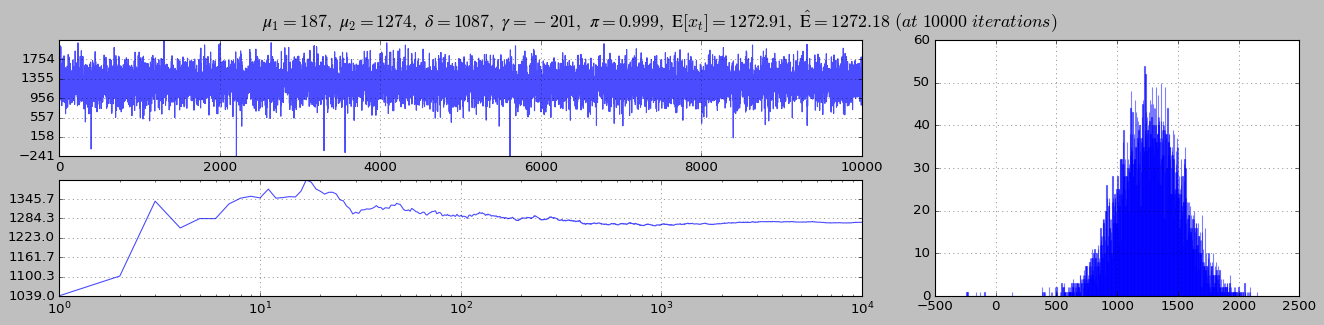

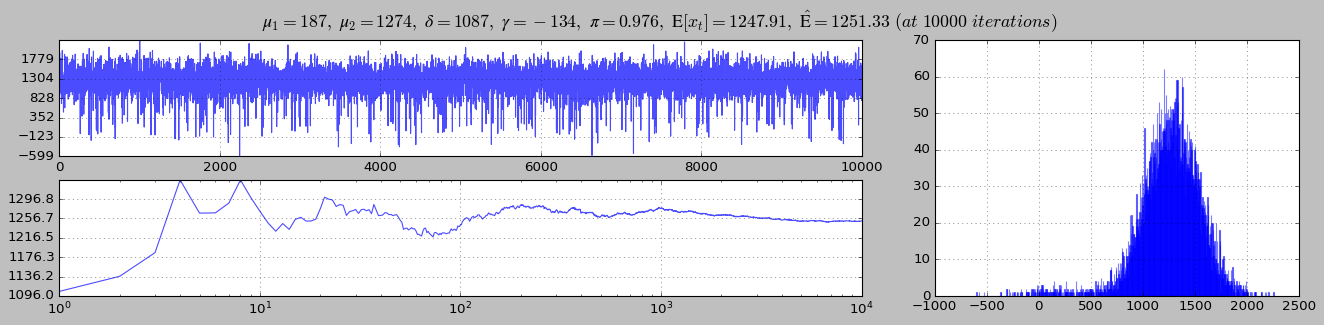

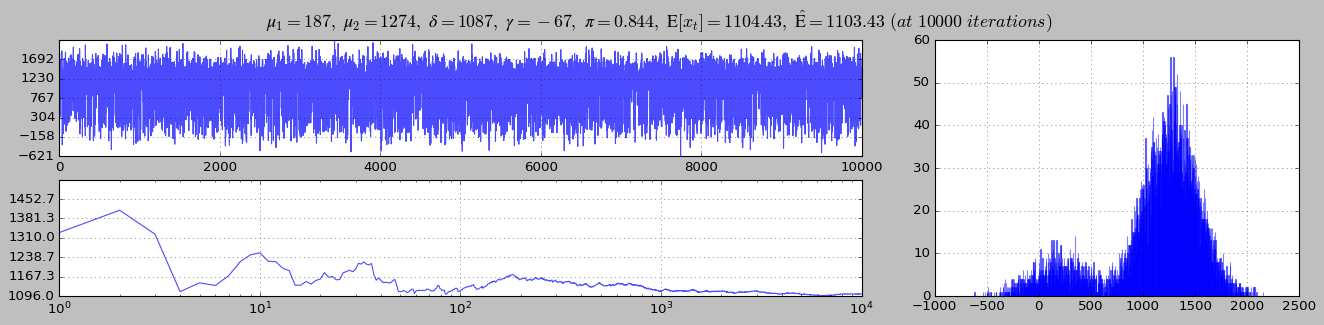

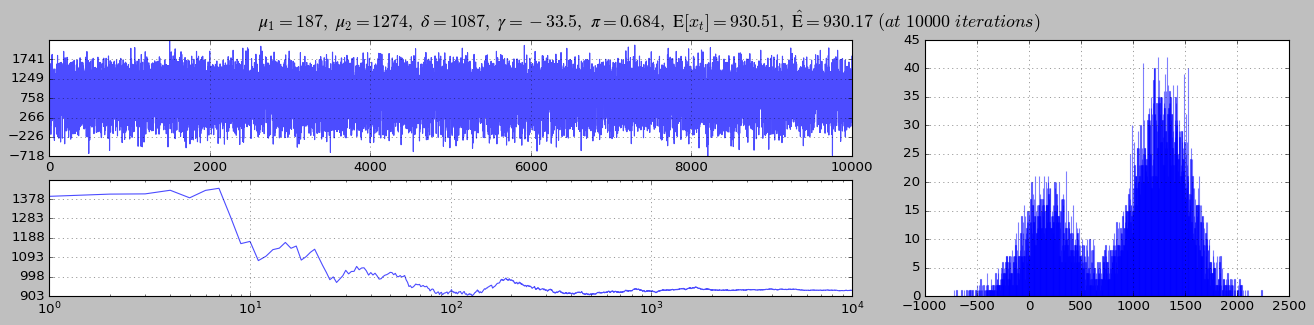

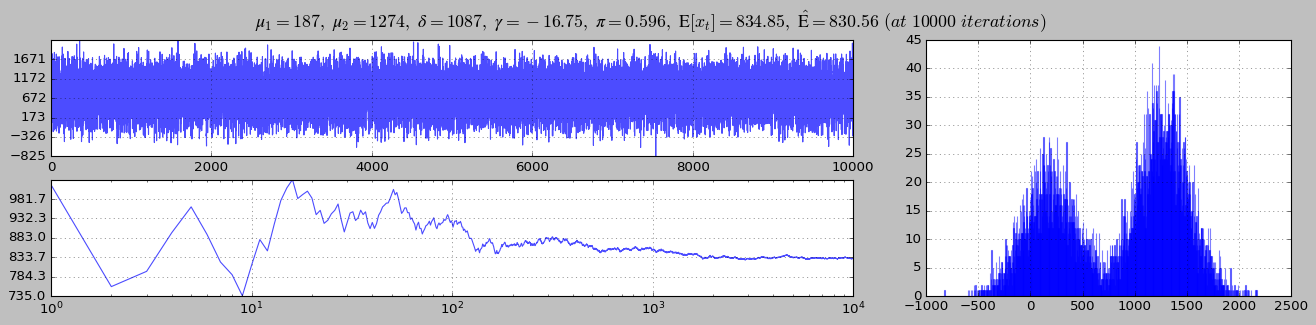

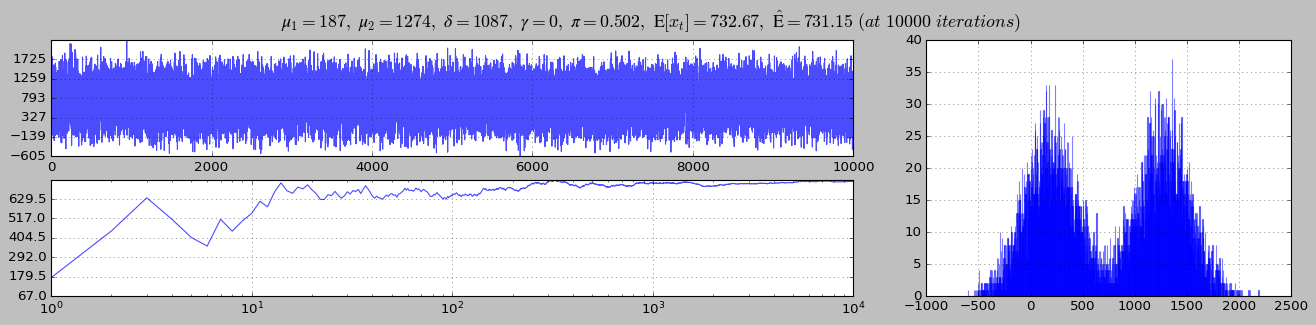

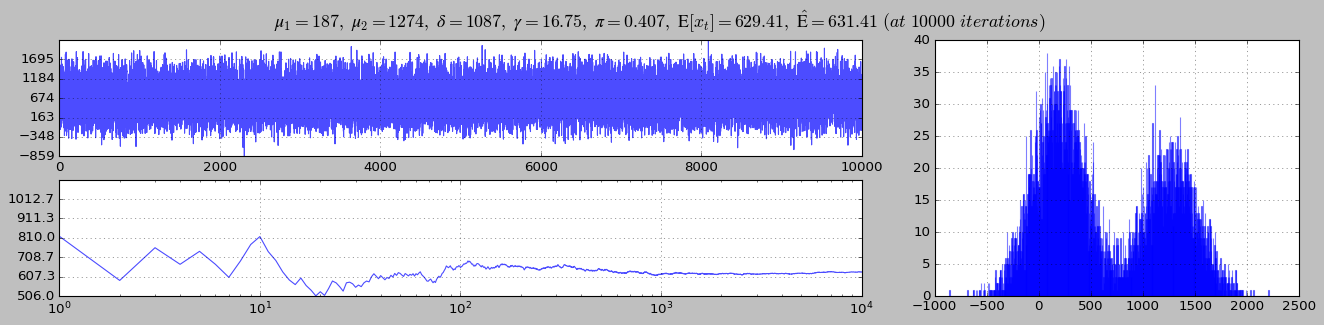

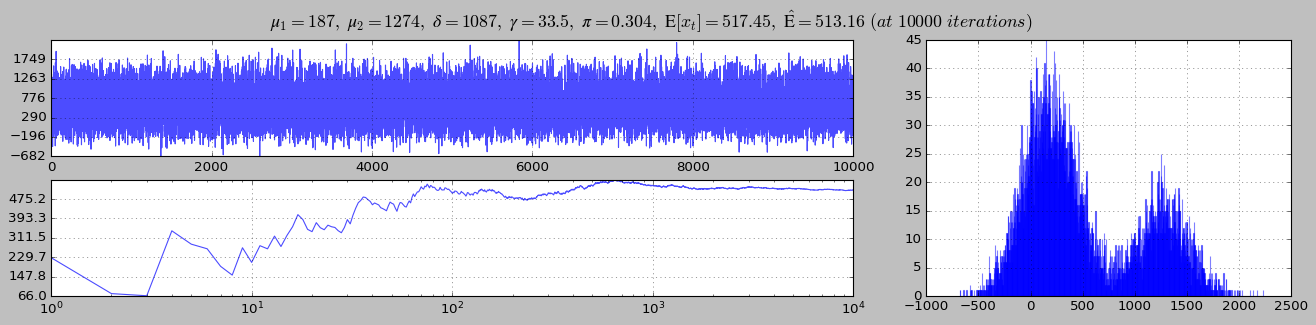

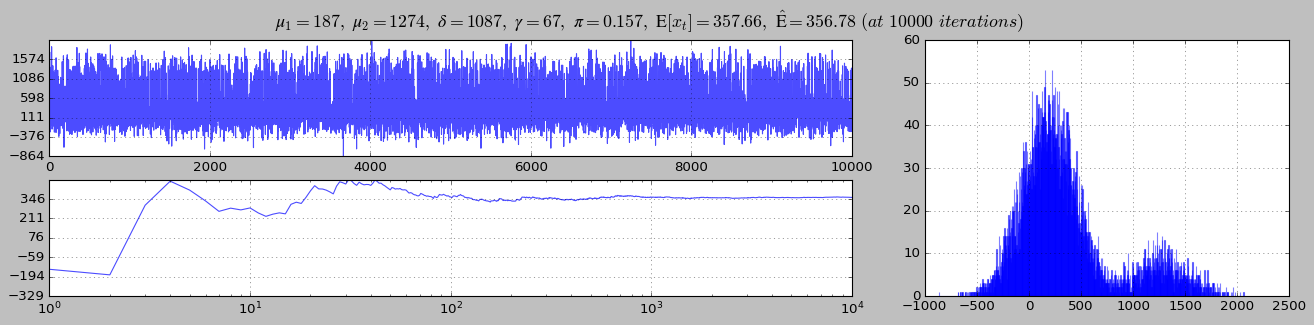

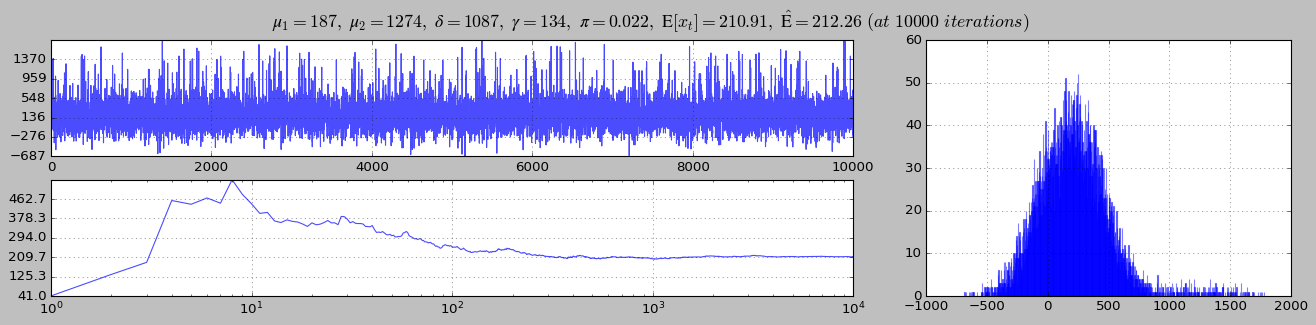

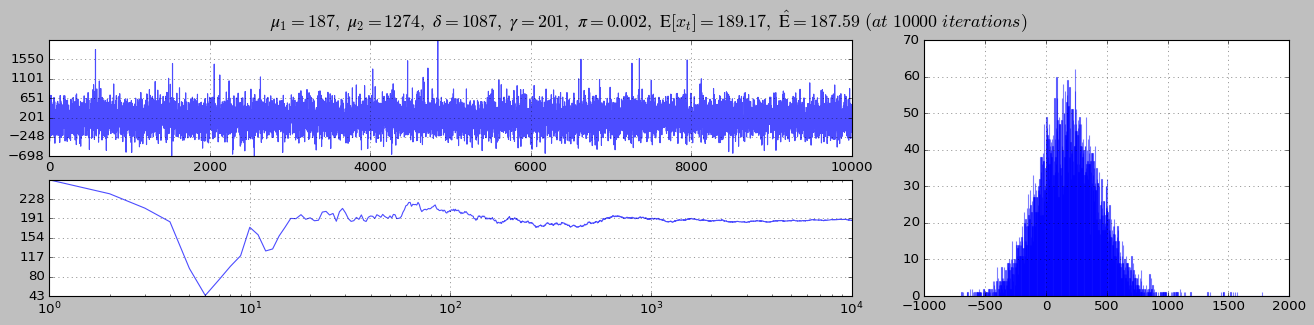

In [27]:
mean = 0
sd = 250

v_mean = 0
v_sd = 67

mu1 = 187
mu2 = 1274
gamma = v_sd

def DJRVwB(T,ROUNDING_DIGITS, mu1, mu2, gamma):
    x = 0
    delta = mu2 - mu1
    
    array_indic = []
    array_vt = []
    array_et = []

    ts = []
    for t in range(T):
        vt = np.round(np.random.normal(v_mean,v_sd,1),ROUNDING_DIGITS)[0]
        et = np.round(np.random.normal(mean,sd,1),ROUNDING_DIGITS)[0]
        if vt > gamma:
            indic = 1
        else:
            indic = 0
        x = mu1 + indic * delta + et
        array_indic.append(indic)
        array_vt.append(vt)
        array_et.append(et)
        ts.append(x)
    
    return ts,array_indic,array_vt,array_et


for thres in [-3,-2,-1,-0.5,-0.25,0,0.25,0.5,1,2,3]:
    gamma = round(v_sd * thres,3)

    ts,array_indic,array_vt,array_et = DJRVwB(T, ROUNDING_DIGITS, mu1, mu2, gamma)

    xps = fn_expected_value_DJRVwB(ts,mu1,mu2,array_indic,array_et)

    pi = round(np.mean(array_indic),3)
    fn_makegridplot(xps, ts, title = f"$μ_1 = {mu1}, ~ μ_2 = {mu2}, ~ δ = {mu2-mu1}, ~ γ = {gamma}, ~ π = {pi}, ~ Ε[x_t]={round(mu1 + (mu2-mu1) * pi,2)}, ~ \\hatΕ = {round(xps[-1],2)}~(at~{T}~iterations)$",
                    plotwidth = 20,
                    plotheight = 4,
                    usexlog = (False,True),
                    useseries_hist = 'ts',
                    yspace = 1)

    plt.show()

## $x_t^{TSB} = μ_1 1_{\left(t ≤ t^{*} \right)} + μ_2 1_{\left(t > t^{*} \right)} + ɛ_t $
## $x_t = μ_1 + (μ_2 - μ_1) 1_{\left(t > t^{*} \right)}  + ɛ_t$
## $x_t = μ_1 + δ 1_{\left(t > t^{*} \right)}  + ɛ_t $

- $δ = (μ_2 - μ_1)$
- $ε_t∼i.i.d.(0,σ_{ε}^{2})$
- $\underset{T → ∞}{lim}~\dfrac{1}{T} \sum_{t=1}^{T} 1_{\left(t > t^{*} \right)} = \dfrac{~T^{*}}{~T~~} = λ \in (0,1)$


## Time Series with Structural Break


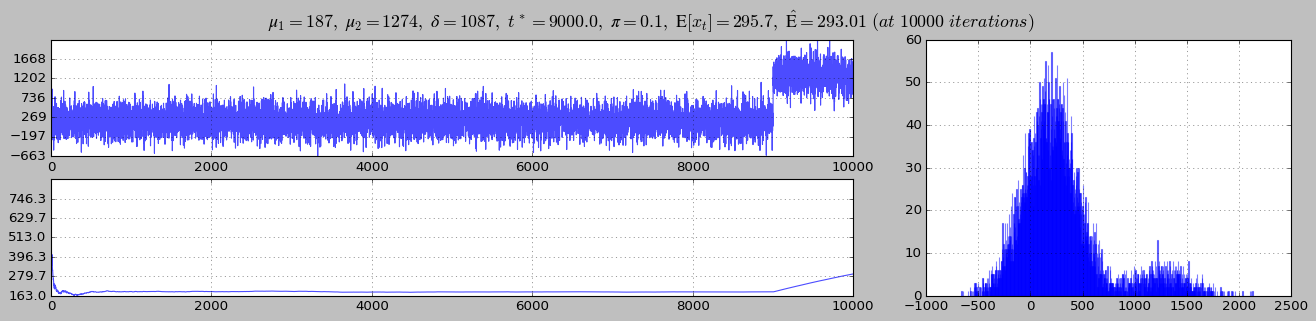

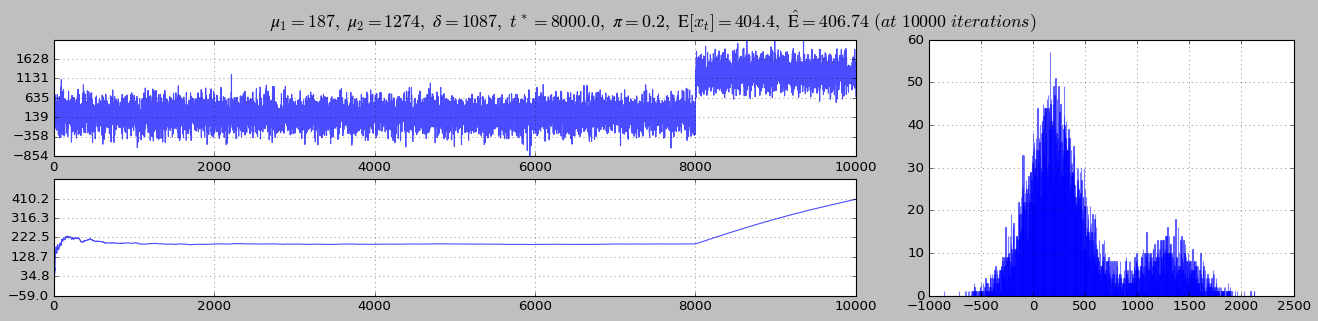

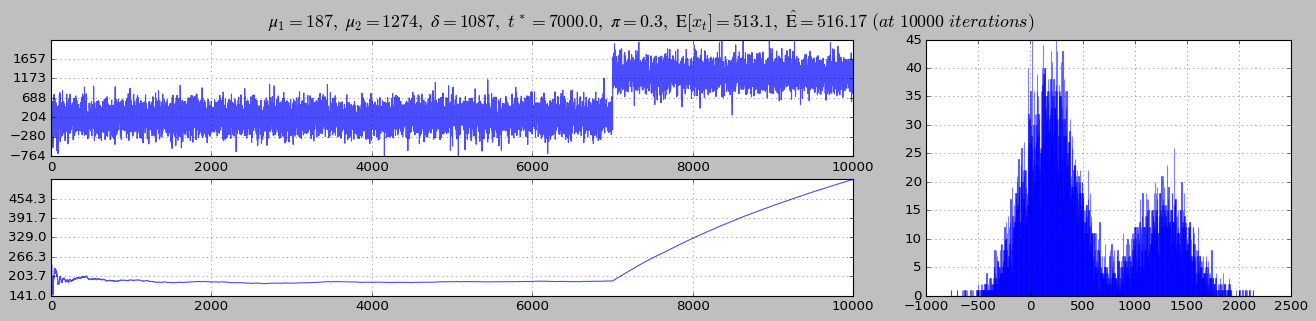

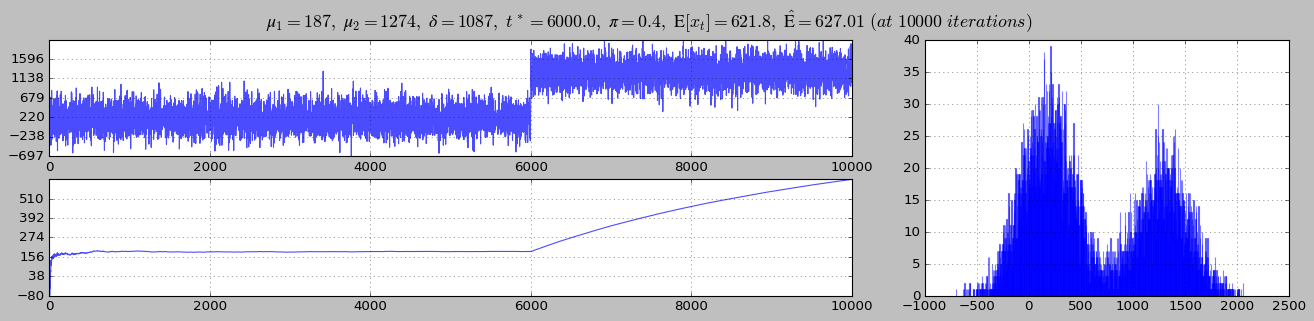

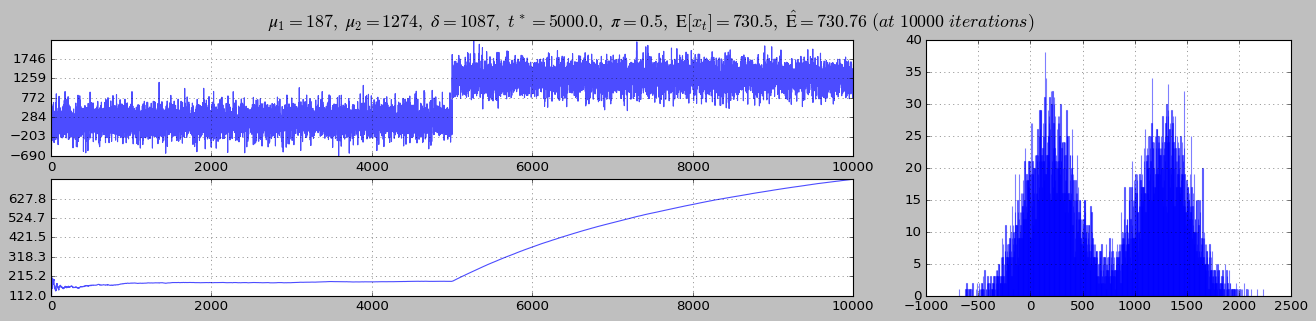

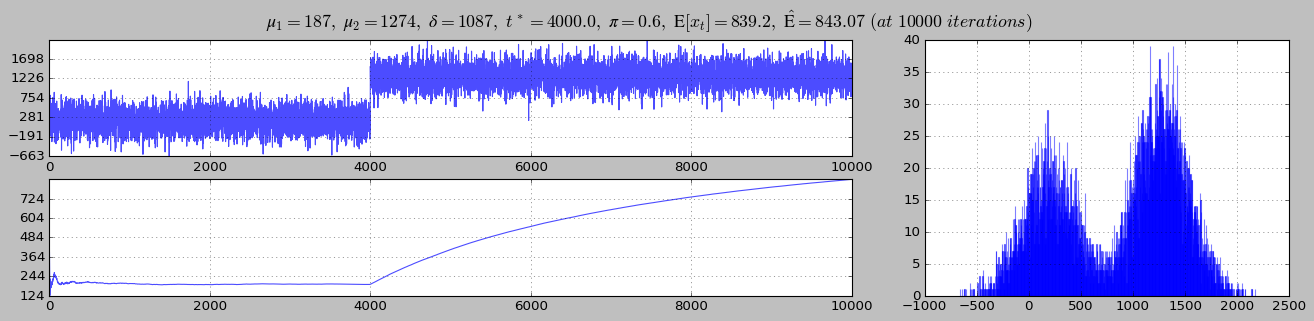

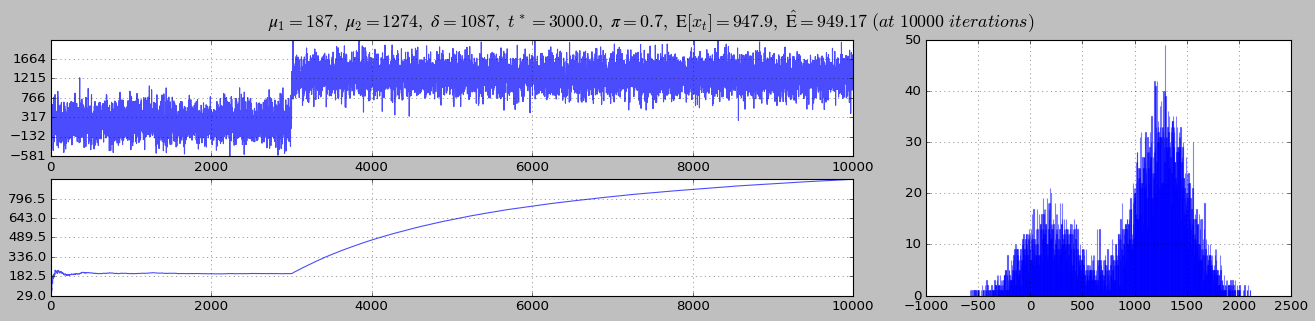

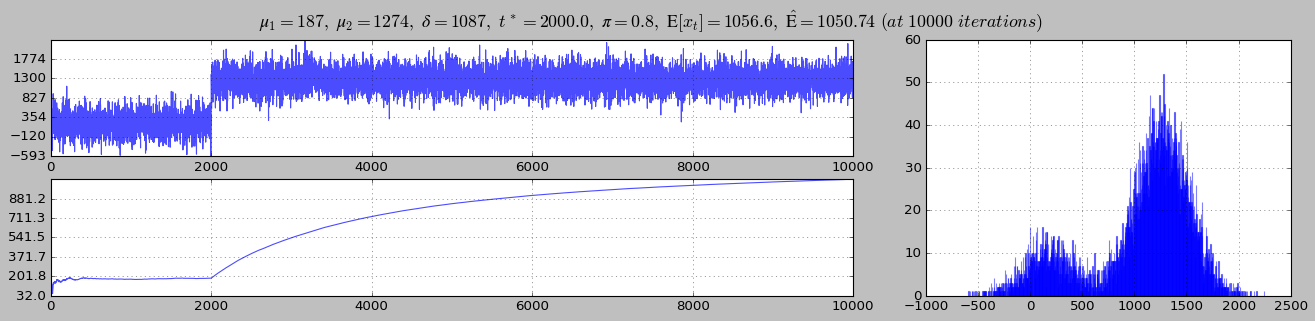

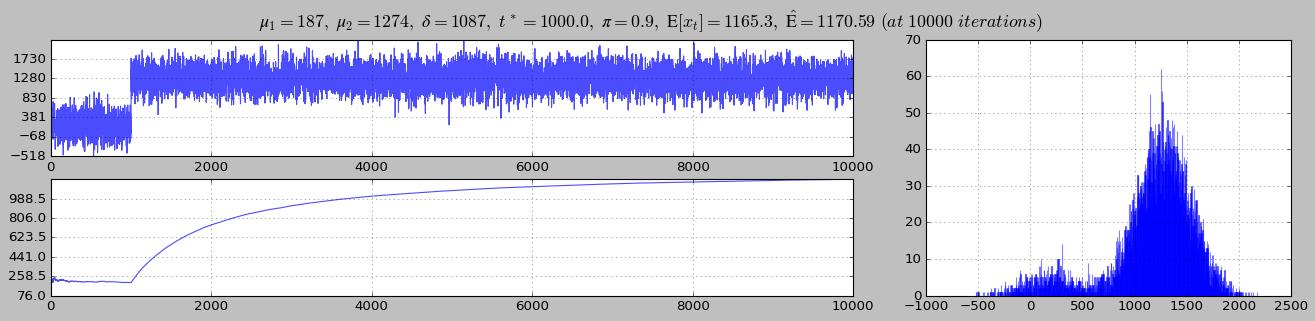

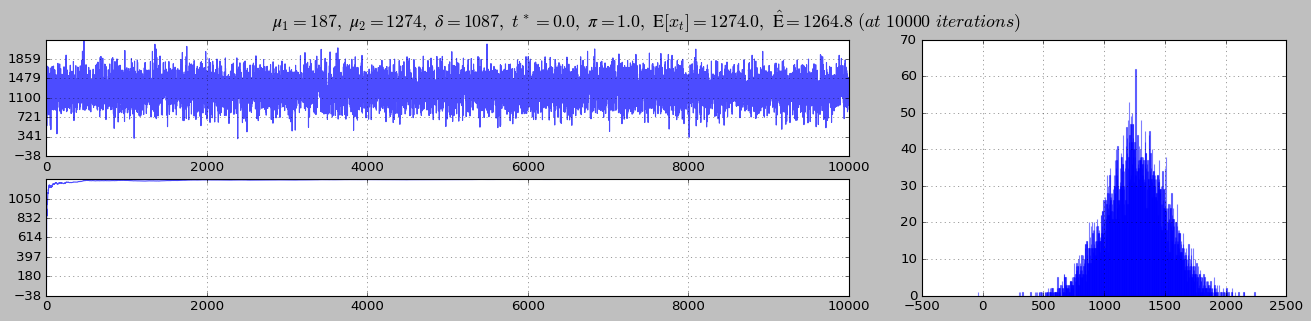

In [28]:
t_star = T/3

mu1 = 187
mu2 = 1274

def TSwStructuralBreak(T,ROUNDING_DIGITS, mu1, mu2, t_star):
    x = 0
    delta = mu2 - mu1
    
    array_indic = []
    array_et = []

    ts = []
    for t in range(T):
        et = np.round(np.random.normal(mean,sd,1),ROUNDING_DIGITS)[0]
        if t > t_star:
            indic = 1
        else:
            indic = 0
        x = mu1 + indic * delta + et
        array_indic.append(indic)
        array_et.append(et)
        ts.append(x)
    
    return ts,array_indic,array_et


for thres in range(1,11):
    t_star = round(T*(1-thres/10),0)

    ts,array_indic,array_et = TSwStructuralBreak(T, ROUNDING_DIGITS, mu1, mu2, t_star)

    xps = fn_expected_value_DJRVwB(ts,mu1,mu2,array_indic,array_et)

    pi = round(np.mean(array_indic),3)
    fn_makegridplot(xps, ts, title = f"$μ_1 = {mu1}, ~ μ_2 = {mu2}, ~ δ = {mu2-mu1}, ~ t^* = {t_star}, ~ π = {pi}, ~ Ε[x_t]={round(mu1 + (mu2-mu1) * pi,2)}, ~ \\hatΕ = {round(xps[-1],2)}~(at~{T}~iterations)$",
                    plotwidth = 20,
                    plotheight = 4,
                    usexlog = (False,False),
                    useseries_hist = 'ts',
                    yspace = 1)

    plt.show()

## $x_t^{DT} = α + βt + ε_t$

- $ε_t∼i.i.d.(0,σ_{ε}^{2})$


## Deterministic Trend with Constant and Error Term

$Deterministic~Trend~with~Constant~and~Error~Term ⟹ x_t = α + βt + ε_t$

$\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}\left(α + βt + ε_t\right) = α + β⋅\dfrac{T(T+1)}{2}$

$\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}\left(α + βt + ε_t\right) = \dfrac{α}{T} + β⋅\dfrac{1}{T^{2}}\dfrac{T(T+1)}{2}+\dfrac{1}{T}⋅Ε[ε_t] ~\underset{T → ∞}{⟶}~\dfrac{β}{2}$


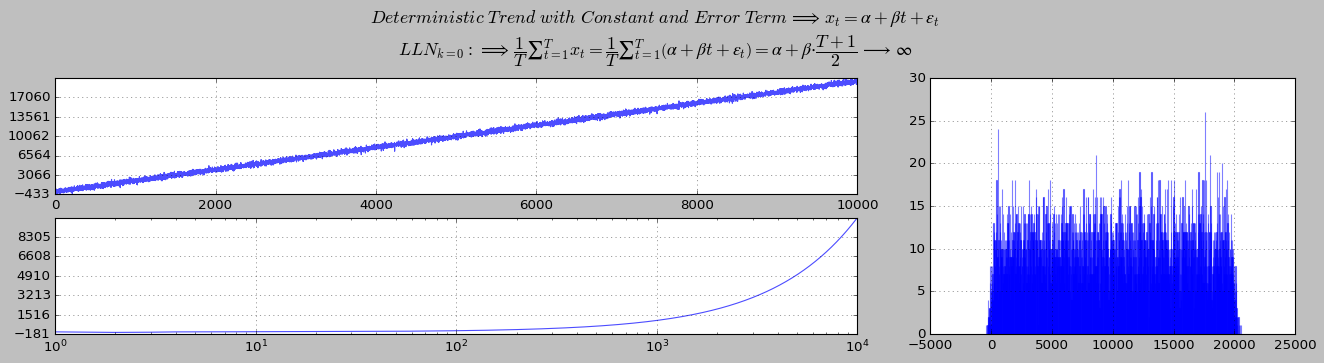

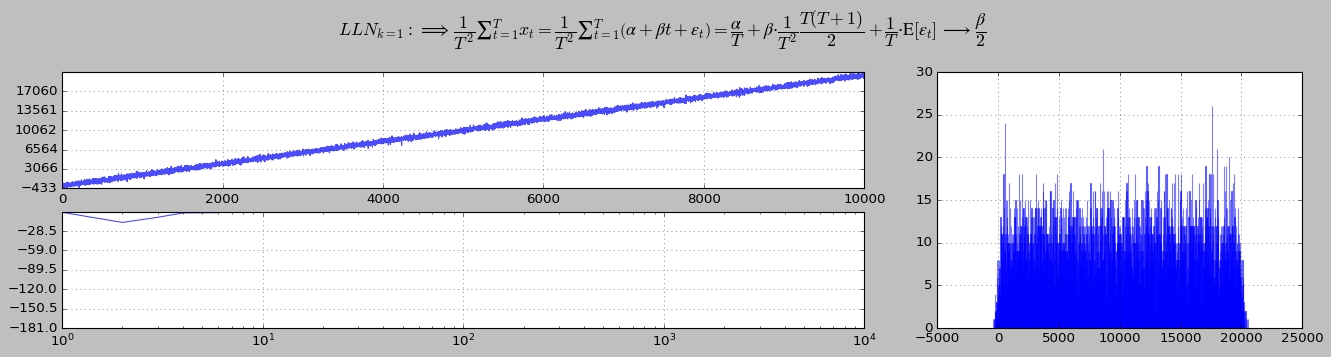

In [29]:
alpha = 15
beta = 2

def DeterministicTrend(T,ROUNDING_DIGITS, alpha, beta):
    x = 0

    array_et = []
    
    ts = []
    for t in range(T):
        et = np.round(np.random.normal(mean,sd,1),ROUNDING_DIGITS)[0]
        x = alpha + beta * t + et
        
        ts.append(x)
        array_et.append(et)

    return ts, array_et

ts, array_et = DeterministicTrend(T,ROUNDING_DIGITS, alpha, beta)

xps = fn_expected_value_DeterministicTrend(ts,array_et,alpha,beta,k=0)

fn_makegridplot(xps, ts, title = f"$Deterministic~Trend~with~Constant~and~Error~Term~⟹~x_t = α + βt + ε_t$\n" + r"$LLN_{k=0}:~⟹~\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}\left(α + βt + ε_t\right) = α + β⋅\dfrac{T+1}{2}~⟶~∞$",
                plotwidth = 20,
                plotheight = 4,
                usexlog = (False,True),
                useseries_hist = 'ts',
                yspace = 1.12)

xps = fn_expected_value_DeterministicTrend(ts,array_et,alpha,beta,k=1)

fn_makegridplot(xps, ts, title = r"$LLN_{k=1}:~⟹~\dfrac{1}{T^{2}}∑_{t=1}^{T}x_{t}=\dfrac{1}{T^{2}}∑_{t=1}^{T}\left(α + βt + ε_t\right) = \dfrac{α}{T} + β⋅\dfrac{1}{T^{2}}\dfrac{T(T+1)}{2}+\dfrac{1}{T}⋅Ε[ε_t]~⟶~\dfrac{β}{2}$",
                plotwidth = 20,
                plotheight = 4,
                usexlog = (False,True),
                useseries_hist = 'ts',
                yspace = 1.1)

## $x_t^{RW} = x_{t-1} + ε_t$
## $x_t = x_0 + ∑_{i=1}^{t} ε_i$

- $ε_t∼i.i.d.(0,σ_{ε}^{2})$


## Random Walk

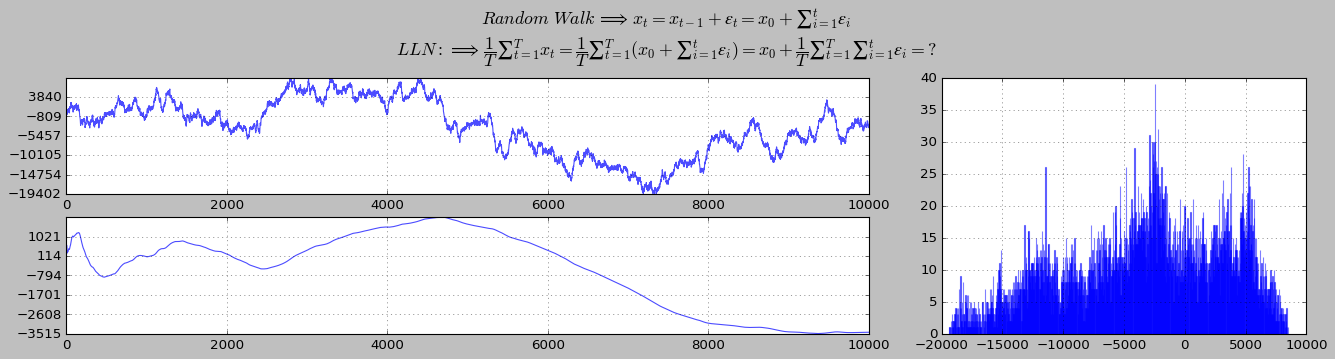

In [30]:
def RandomWalk(T,ROUNDING_DIGITS):
    x = 0
    x_1 = 0
    et_1 = 0
    theta = 0.8

    ts = []
    for t in range(T):
        et = np.round(np.random.normal(mean,sd,1),ROUNDING_DIGITS)[0]
        x = x_1 + et
        ts.append(x)
        x_1 = x

    return ts

ts = RandomWalk(T,ROUNDING_DIGITS)

xps = fn_expected_value_RandomWalk(ts,k=0)

fn_makegridplot(xps, ts, title = f"$Random~Walk~⟹~$"+r"$x_t = x_{t-1} + ε_t = x_0 + ∑_{i=1}^{t} ε_i$" + f"\n" + r"$LLN:~⟹~\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}(x_0 + ∑_{i=1}^{t} ε_i) = x_0 + \dfrac{1}{T}∑_{t=1}^{T}∑_{i=1}^{t} ε_i = ?$",
                plotwidth = 20,
                plotheight = 4,
                usexlog = (False,False),
                useseries_hist = 'ts',
                yspace = 1.12)

## $d_1(t) = x_t^{RW} - x_{t-1}^{RW}$
## $d_1(t) = x_{t-1} + ε_t - x_{t-1}$
## $d_1(t) = ε_t $

## First Difference of Random Walk

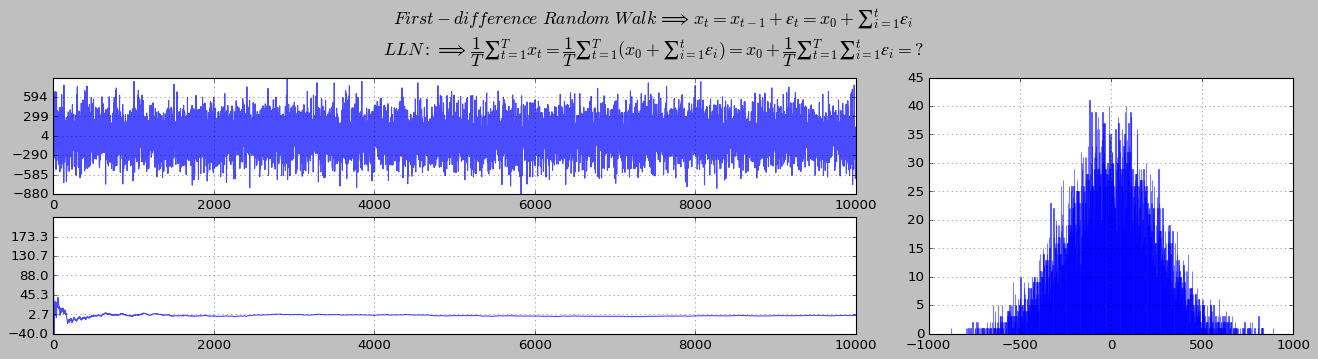

In [31]:
ts_1 = []
ts_1.append(0)

for t in range(T-1):
    ts_1.append(round(ts[t+1]-ts[t],2))

xps_1 = fn_expected_value_RandomWalk(ts_1)

fn_makegridplot(xps_1, ts_1, title = f"$First-difference~Random~Walk~⟹~$"+r"$x_t = x_{t-1} + ε_t = x_0 + ∑_{i=1}^{t} ε_i$" + f"\n" + r"$LLN:~⟹~\dfrac{1}{T}∑_{t=1}^{T}x_{t}=\dfrac{1}{T}∑_{t=1}^{T}(x_0 + ∑_{i=1}^{t} ε_i) = x_0 + \dfrac{1}{T}∑_{t=1}^{T}∑_{i=1}^{t} ε_i = ?$",
                plotwidth = 20,
                plotheight = 4,
                usexlog = (False,False),
                useseries_hist = 'ts',
                yspace = 1.12)